# Beamsplitter

Calculate the transmission/reflection for a Zitex beamsplitter.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as sc

from rftools import lossless_slab_at_angle, ZITEX_N

plt.style.use(["science", "notebook"])

In [2]:
print(f"Zitex index of refraction: {ZITEX_N:.3f}")

Zitex index of refraction: 1.220


# Parallel Polarization

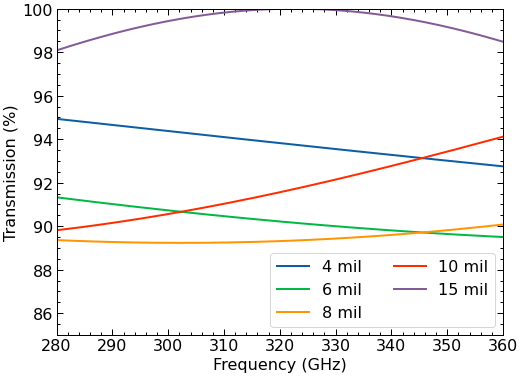

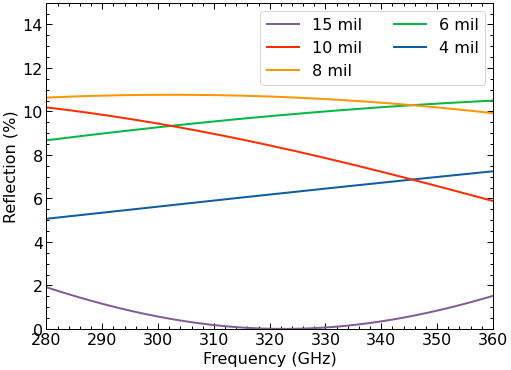

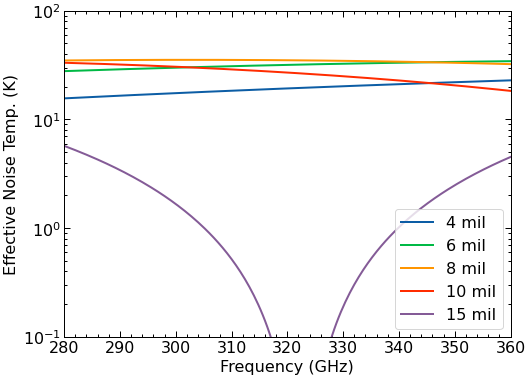

In [3]:
f = np.linspace(280, 360, 201) * sc.giga
fghz = f / 1e9

fig2, ax2 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()
thicknesses = np.array([4, 6, 8, 10, 15]) * sc.mil
for d in thicknesses:
    reflec, trans = lossless_slab_at_angle(ZITEX_N, d, f, pol='parallel')
    dmil = d / sc.mil
    dstr = "{0:.0f} mil".format(dmil)
    ax2.plot(fghz, trans * 100, label=dstr)
    ax4.plot(fghz, reflec * 100, label=dstr)
    temp = (1 / trans - 1) * 293
    ax5.semilogy(fghz, temp, label=dstr)
ax2.set(xlim=[fghz.min(), fghz.max()], xlabel='Frequency (GHz)')
ax4.set(xlim=[fghz.min(), fghz.max()], xlabel='Frequency (GHz)')
ax5.set(xlim=[fghz.min(), fghz.max()], xlabel='Frequency (GHz)')
ax2.set(ylabel='Transmission (%)', ylim=[85, 100])
ax4.set(ylabel='Reflection (%)', ylim=[0, 15])
ax5.set(ylabel='Effective Noise Temp. (K)', ylim=[1e-1, 1e2])
ax2.legend(frameon=True, loc=4, ncol=2)
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles[::-1], labels[::-1], loc=1, frameon=True, ncol=2)
ax5.legend(frameon=True, loc=4);

# Perpendicular Polarization

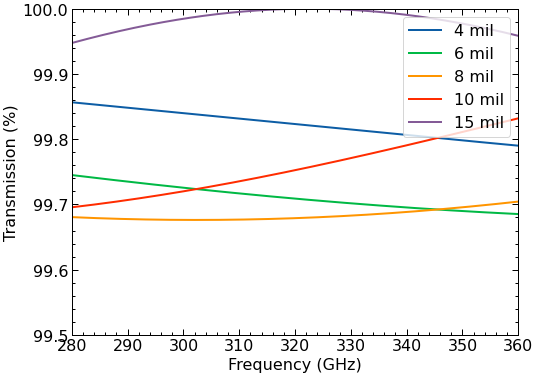

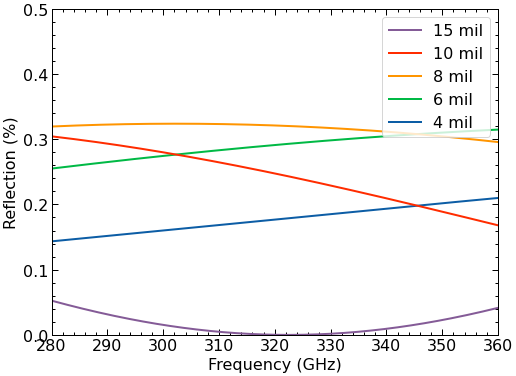

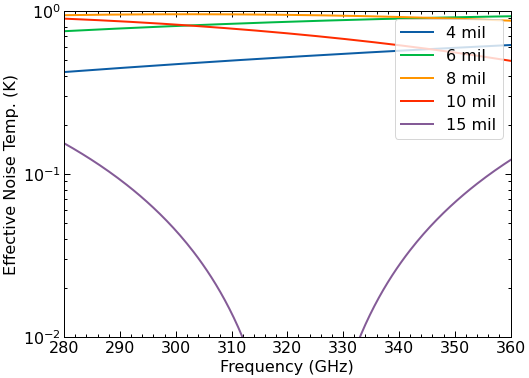

In [4]:
f = np.linspace(280, 360, 201) * sc.giga
fghz = f / 1e9

fig2, ax2 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()
thicknesses = np.array([4, 6, 8, 10, 15]) * sc.mil
for d in thicknesses:
    reflec, trans = lossless_slab_at_angle(ZITEX_N, d, f, pol='perpendicular')
    dmil = d / sc.mil
    dstr = "{0:.0f} mil".format(dmil)
    ax2.plot(fghz, trans * 100, label=dstr)
    ax4.plot(fghz, reflec * 100, label=dstr)
    temp = (1 / trans - 1) * 293
    ax5.semilogy(fghz, temp, label=dstr)
ax2.set(xlim=[fghz.min(), fghz.max()], xlabel='Frequency (GHz)')
ax4.set(xlim=[fghz.min(), fghz.max()], xlabel='Frequency (GHz)')
ax5.set(xlim=[fghz.min(), fghz.max()], xlabel='Frequency (GHz)')
ax2.set(ylabel='Transmission (%)', ylim=[99.5, 100])
ax4.set(ylabel='Reflection (%)', ylim=[0, 0.5])
ax5.set(ylabel='Effective Noise Temp. (K)', ylim=[1e-2, 1e0])
ax2.legend(frameon=True, loc=1)
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles[::-1], labels[::-1], loc=1, frameon=True)
ax5.legend(frameon=True, loc=1);